In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
import joblib
import matplotlib.pyplot as plt


In [ ]:
# Завантаження даних
file_path = '/content/final_df.csv'
data = pd.read_csv(file_path)


In [ ]:
X = data.drop(['churn'], axis=1)  # Фічі
y = data['churn']  # Цільова змінна

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(57819, 18) (14455, 18) (57819,) (14455,)


In [ ]:
# Масштабування даних
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'Decision Tree': DecisionTreeClassifier()
}

# Гіперпараметри для крос-валідації
param_grids = {
    'Logistic Regression': {'C': [0.1, 1, 10, 100]},
    'Random Forest': {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20]},
    'Decision Tree': {'max_depth': [None, 10, 20], 'min_samples_split': [2, 5, 10]}
}

# Крос-валідація та навчання моделей
best_models = {}
history = {}
for model_name, model in models.items():
    grid_search = GridSearchCV(model, param_grids[model_name], cv=5, scoring='accuracy', return_train_score=True)
    grid_search.fit(X_train, y_train)
    best_models[model_name] = grid_search.best_estimator_
    history[model_name] = pd.DataFrame(grid_search.cv_results_)
    print(f"{model_name} best params: {grid_search.best_params_}")
    print(f"{model_name} best score: {grid_search.best_score_}")

# Оцінка моделей
for model_name, model in best_models.items():
    y_pred = model.predict(X_test)
    print(f"{model_name} Accuracy: {accuracy_score(y_test, y_pred)}")
    print(f"{model_name} Recall: {recall_score(y_test, y_pred)}")
    print(f"{model_name} Precision: {precision_score(y_test, y_pred)}")
    print(f"{model_name} F1 Score: {f1_score(y_test, y_pred)}")
    print(f"{model_name} Mean Squared Error: {mean_squared_error(y_test, y_pred)}")

# Збереження моделей машинного навчання
for model_name, model in best_models.items():
    joblib.dump(model, f'{model_name.replace(" ", "_")}_model.pkl')
    print(f"{model_name} model saved as {model_name.replace(' ', '_')}_model.pkl")



Logistic Regression best params: {'C': 1}
Logistic Regression best score: 0.733962842572713
Random Forest best params: {'max_depth': 20, 'n_estimators': 100}
Random Forest best score: 0.8186928463392447
Decision Tree best params: {'max_depth': 10, 'min_samples_split': 10}
Decision Tree best score: 0.7974368305757522
Logistic Regression Accuracy: 0.735593220338983
Logistic Regression Recall: 0.7887183327093473
Logistic Regression Precision: 0.7480175168659013
Logistic Regression F1 Score: 0.7678289393755316
Logistic Regression Mean Squared Error: 0.26440677966101694
Random Forest Accuracy: 0.8242130750605327
Random Forest Recall: 0.8125545987769874
Random Forest Precision: 0.8623841059602649
Random Forest F1 Score: 0.8367281372486025
Random Forest Mean Squared Error: 0.17578692493946732
Decision Tree Accuracy: 0.8009685230024213
Decision Tree Recall: 0.7913390740047423
Decision Tree Precision: 0.8403127484760138
Decision Tree F1 Score: 0.8150909441480815
Decision Tree Mean Squared Error

In [ ]:
for model_name, hist in history.items():
  print(model_name, hist)

Logistic Regression    mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C  \
0       0.108821      0.010240         0.004281        0.000357     0.1   
1       0.112019      0.012421         0.003868        0.000046       1   
2       0.110782      0.013360         0.004065        0.000212      10   

       params  split0_test_score  split1_test_score  split2_test_score  \
0  {'C': 0.1}           0.920789           0.920097           0.922864   
1    {'C': 1}           0.920702           0.920183           0.922864   
2   {'C': 10}           0.920702           0.920183           0.922864   

   split3_test_score  ...  mean_test_score  std_test_score  rank_test_score  \
0           0.922172  ...         0.920545        0.002111                3   
1           0.922259  ...         0.920580        0.002089                2   
2           0.922345  ...         0.920597        0.002103                1   

   split0_train_score  split1_train_score  split2_train_score  \


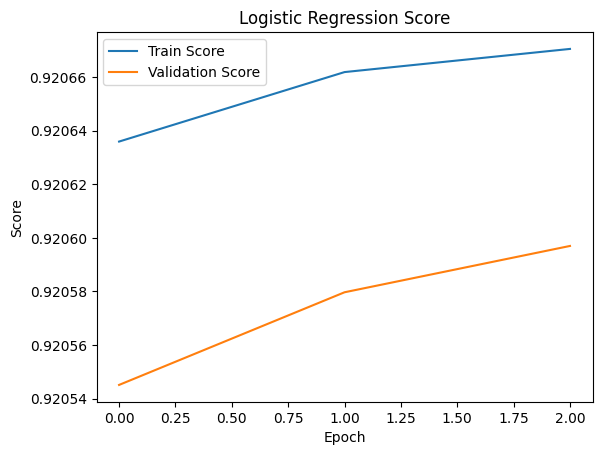

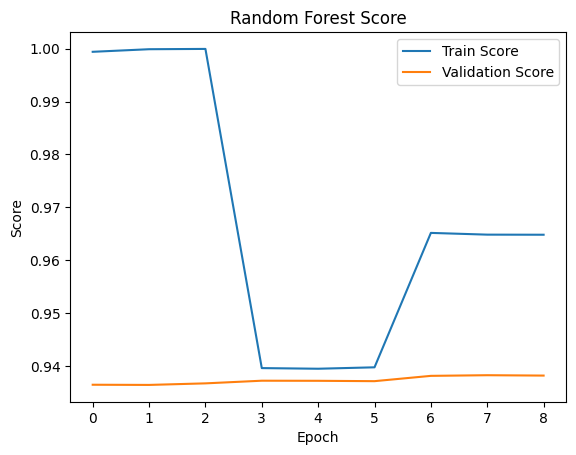

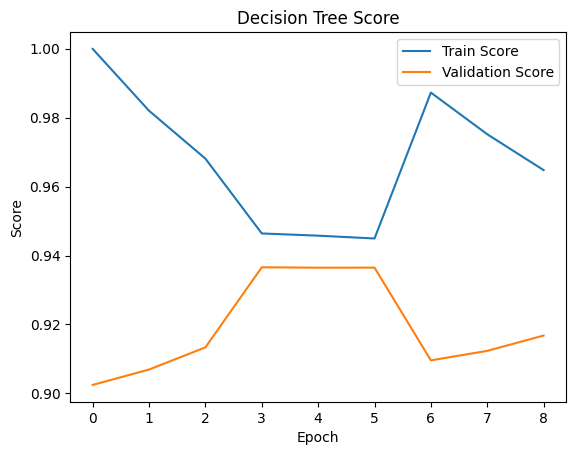

In [ ]:
for model_name, hist in history.items():
    plt.plot(hist['mean_train_score'], label='Train Score')
    plt.plot(hist['mean_test_score'], label='Validation Score')
    plt.title(f'{model_name} Score')
    plt.xlabel('Epoch')
    plt.ylabel('Score')
    plt.legend()
    plt.show()

Як ми бачимо найбільш погані результати показує Logistic Regression, проте все одно це дуже гарний результат. Дві інші моделі мають чудові метрики , що показує на їх правильне навчання